# Support Vector Machines

In [42]:
import numpy as np
import pandas as pd
import scipy as sp
import sklearn
import pickle
import matplotlib as mat
import matplotlib.pyplot as plt
import plotly.plotly as py
import seaborn as sb
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_auc_score
from sklearn import svm

# Reading Data

In [43]:
df=pd.read_csv("Spam.csv")
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


# Data Visualisation

In [44]:
df.isnull().values.any()

False

In [45]:
df.spam.value_counts()

0    2788
1    1813
Name: spam, dtype: int64

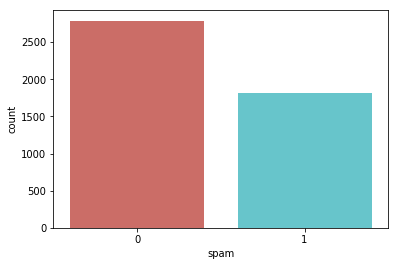

In [46]:
sb.countplot(x='spam',data=df, palette='hls')

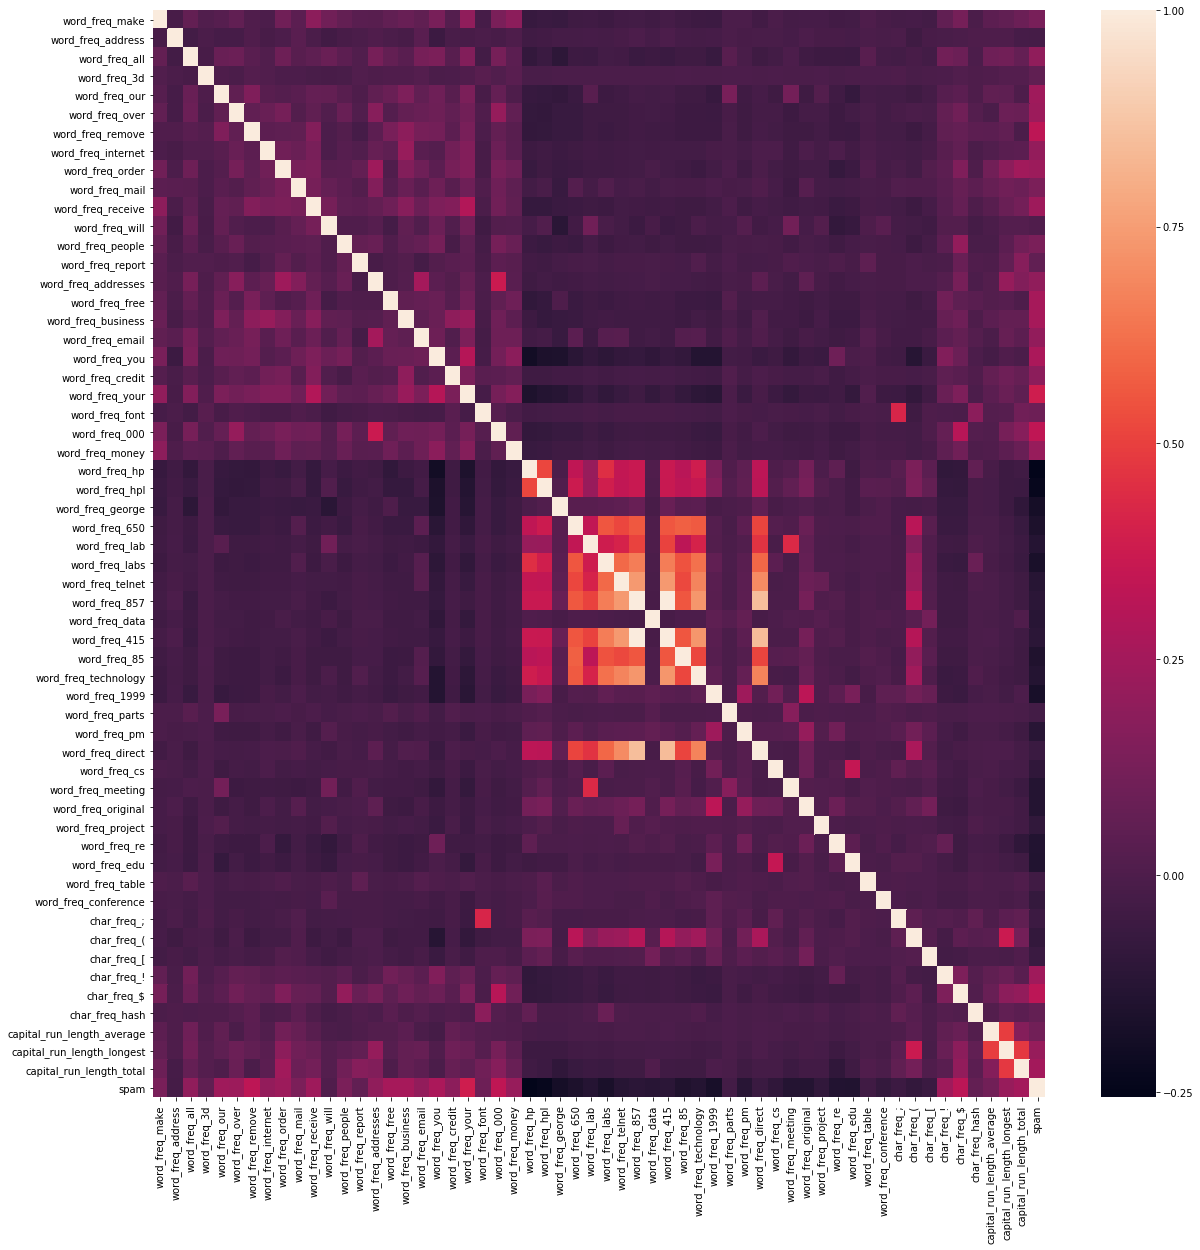

In [47]:
plt.figure(figsize=(20,20))
sb.heatmap(df.corr())
plt.show()

In [48]:
df.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [49]:
df.groupby('spam').max()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total
spam,,,,,,,,,,,,,,,,,,,,,
0,4.34,14.28,5.1,0.87,10.00,5.88,3.07,5.88,5.26,18.18,...,10.00,4.385,5.277,4.081,32.478,2.038,7.407,251.0,1488,5902
1,4.54,4.76,3.7,42.81,7.69,2.54,7.27,11.11,3.33,7.55,...,0.77,1.117,9.752,1.171,7.843,6.003,19.829,1102.5,9989,15841


In [50]:
df.groupby('spam').mean()


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total
spam,,,,,,,,,,,,,,,,,,,,,
0,0.073479,0.244466,0.200581,0.000886,0.181040,0.044544,0.009383,0.038415,0.038049,0.167170,...,0.051227,0.050281,0.158578,0.022684,0.109984,0.011648,0.021713,2.377301,18.214491,161.470947
1,0.152339,0.164650,0.403795,0.164672,0.513955,0.174876,0.275405,0.208141,0.170061,0.350507,...,0.002101,0.020573,0.108970,0.008199,0.513713,0.174478,0.078877,9.519165,104.393271,470.619415


# Data Normalization

In [51]:
minmax=MinMaxScaler()
norm=pd.DataFrame(minmax.fit_transform(df.drop(['spam'],axis=1)),columns=df.drop(['spam'],axis=1).dtypes.index)
norm.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.000000,0.044818,0.125490,0.0,0.032,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.023955,0.000000,0.000000,0.002502,0.006007,0.017487
1,0.046256,0.019608,0.098039,0.0,0.014,0.047619,0.028886,0.006301,0.000000,0.051705,...,0.0,0.000000,0.013536,0.0,0.011454,0.029985,0.002421,0.003735,0.010012,0.064836
2,0.013216,0.000000,0.139216,0.0,0.123,0.032313,0.026135,0.010801,0.121673,0.013751,...,0.0,0.002281,0.014664,0.0,0.008498,0.030651,0.000504,0.008008,0.048458,0.142551
3,0.000000,0.000000,0.000000,0.0,0.063,0.000000,0.042641,0.056706,0.058935,0.034653,...,0.0,0.000000,0.014048,0.0,0.004218,0.000000,0.000000,0.002303,0.003905,0.011995
4,0.000000,0.000000,0.000000,0.0,0.063,0.000000,0.042641,0.056706,0.058935,0.034653,...,0.0,0.000000,0.013843,0.0,0.004157,0.000000,0.000000,0.002303,0.003905,0.011995


In [52]:
df_norm=norm.join(df['spam'])
df_norm.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.000000,0.044818,0.125490,0.0,0.032,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.023955,0.000000,0.000000,0.002502,0.006007,0.017487,1
1,0.046256,0.019608,0.098039,0.0,0.014,0.047619,0.028886,0.006301,0.000000,0.051705,...,0.000000,0.013536,0.0,0.011454,0.029985,0.002421,0.003735,0.010012,0.064836,1
2,0.013216,0.000000,0.139216,0.0,0.123,0.032313,0.026135,0.010801,0.121673,0.013751,...,0.002281,0.014664,0.0,0.008498,0.030651,0.000504,0.008008,0.048458,0.142551,1
3,0.000000,0.000000,0.000000,0.0,0.063,0.000000,0.042641,0.056706,0.058935,0.034653,...,0.000000,0.014048,0.0,0.004218,0.000000,0.000000,0.002303,0.003905,0.011995,1
4,0.000000,0.000000,0.000000,0.0,0.063,0.000000,0.042641,0.056706,0.058935,0.034653,...,0.000000,0.013843,0.0,0.004157,0.000000,0.000000,0.002303,0.003905,0.011995,1


In [53]:
standardized_data = df.drop('spam',axis=1)
standardized_data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191


# Principle Component Analysis

In [54]:
pca = PCA(n_components =2)
data_pca = pca.fit_transform(standardized_data)

In [55]:
pca.explained_variance_

array([377005.59160808,  28891.92841175])

In [56]:
pca.explained_variance_ratio_

array([0.92702701, 0.07104297])

In [57]:
pca.explained_variance_ratio_.cumsum()

array([0.92702701, 0.99806998])

In [58]:
data_pca = pd.DataFrame(data = data_pca, columns = ['principal_component_1', 'principal_component_2'])
data_pca.head()

,principal_component_1,principal_component_2
0,-3.786900,9.411757
1,742.632101,-74.001353
2,2019.854074,102.077111
3,-93.048341,3.008569
4,-93.048341,3.008568


In [59]:
data_pca = data_pca.join(df['spam'])

In [60]:
data_pca.describe()

,principal_component_1,principal_component_2,spam
count,4601.000000,4.601000e+03,4601.000000
mean,0.000000,2.372079e-15,0.394045
std,614.007811,1.699763e+02,0.488698
min,-286.885439,-2.578886e+03,0.000000
25%,-252.353386,-1.281498e+01,0.000000
50%,-190.885839,-4.910982e+00,0.000000
75%,-17.090600,1.139793e+00,1.000000
max,15342.296037,8.182005e+03,1.000000


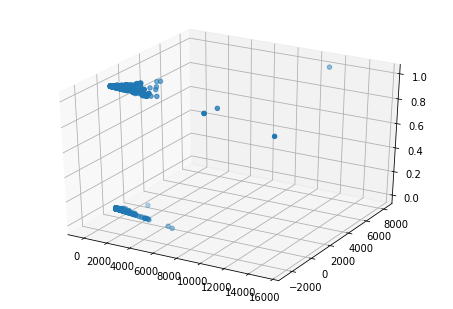

In [61]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(data_pca['principal_component_1'],data_pca['principal_component_2'],data_pca['spam'])
plt.show()


# Data Preparation

In [62]:
shuffle_index = np.random.permutation(len(df_norm))
shuffle_index

array([1184, 2890, 1925, ..., 1650, 1933,  441])

In [63]:
test_size = int( len(shuffle_index) * 0.3)
test_size

1380

In [64]:
test_data = shuffle_index[:test_size]
train_data = shuffle_index[test_size:]
train = df_norm.iloc[train_data]
test = df_norm.iloc[test_data]

In [65]:
train.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
35,0.000000,0.0,0.501961,0.0,0.000,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.031583,0.0,0.047509,0.000000,0.0,0.001613,0.000501,0.001515,1
3619,0.000000,0.0,0.000000,0.0,0.000,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000189,0
4027,0.017621,0.0,0.031373,0.0,0.000,0.013605,0.0,0.007201,0.015209,0.0,...,0.045382,0.010767,0.0,0.000000,0.003831,0.0,0.000797,0.002303,0.046654,0
2404,0.000000,0.0,0.000000,0.0,0.082,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.037018,0.0,0.007390,0.000000,0.0,0.003328,0.003304,0.007891,0
4440,0.000000,0.0,0.000000,0.0,0.043,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.008101,0.0,0.000000,0.000000,0.0,0.000265,0.000400,0.003283,0


In [66]:
test.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
1184,0.000000,0.032213,0.090196,0.0,0.138,0.000000,0.0,0.166517,0.000000,0.050605,...,0.0,0.007383,0.000000,0.024478,0.036149,0.000000,0.003512,0.006508,0.014078,1
2890,0.000000,0.000000,0.145098,0.0,0.000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.013433,0.010537,0.001324,0.000000,0.000000,0.001333,0.001402,0.012247,0
1925,0.000000,0.000000,0.000000,0.0,0.000,0.000000,0.0,0.160216,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000605,0.000601,0.000884,0
3526,0.028634,0.004202,0.000000,0.0,0.013,0.022109,0.0,0.000000,0.024715,0.014851,...,0.0,0.019893,0.000000,0.000893,0.007996,0.000454,0.000720,0.002203,0.055997,0
3145,0.000000,0.000000,0.000000,0.0,0.000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000189,0


# Applying SVM (linear kernel)

In [67]:
svc = SVC(kernel='linear',gamma=1)
svc.fit(train.drop('spam',axis=1),train['spam'])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [68]:
predictions = svc.predict(test.drop('spam',axis=1))

# Data Validation

In [69]:
accuracy_score(test['spam'],predictions)

0.9014492753623189

In [70]:
cm=confusion_matrix(test['spam'],predictions)
cm

array([[793,  41],
       [ 95, 451]])

In [71]:
precision_recall_fscore_support(test['spam'], predictions, average='macro')

(0.9048423423423424, 0.8884233272722482, 0.8950004363792605, None)

In [72]:
auc = roc_auc_score(test['spam'], predictions)
auc

0.8884233272722482

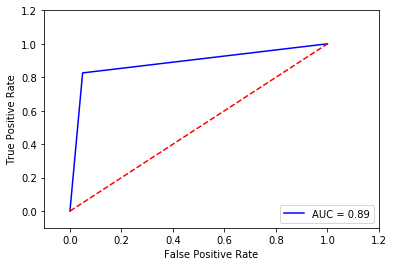

In [73]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(test['spam'],predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc) 
plt.legend(loc='lower right') 
plt.plot([0,1],[0,1],'r--') 
plt.xlim([-0.1,1.2]) 
plt.ylim([-0.1,1.2]) 
plt.ylabel('True Positive Rate') 
plt.xlabel('False Positive Rate')
plt.show()

# Applying SVM(Polynomial Kernels)

In [74]:
svc_p = SVC(kernel='poly', degree=8)  
svc_p.fit(train.drop('spam',axis=1),train['spam'])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=8, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [75]:
pred_p= svc_p.predict(test.drop('spam',axis=1))

In [76]:
accuracy_score(test['spam'],pred_p)

0.6043478260869565

# Applying SVM(Gaussian Kernel)

In [77]:
svc_g = SVC(kernel='rbf')  
svc_g.fit(train.drop('spam',axis=1),train['spam']) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [78]:
pred_g = svc_g.predict(test.drop('spam',axis=1)) 

In [79]:
accuracy_score(test['spam'],pred_g)

0.7891304347826087

# Applying SVM (Sigmoid Kernel)

In [80]:
svclassifier = SVC(kernel='sigmoid')  
svclassifier.fit(train.drop('spam',axis=1),train['spam']) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='sigmoid',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [81]:
pred_s = svclassifier.predict(test.drop('spam',axis=1)) 

In [82]:
accuracy_score(test['spam'],pred_s)

0.6318840579710145